In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 1024.", name="epoch 500")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=500, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4206592   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 4,232,217
Trainable params: 4,232,217
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/500
5/5 [==============================] - ETA: 0s - loss: 1.4639 - mae: 0.9843

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 7s 1s/step - loss: 1.4639 - mae: 0.9843 - val_loss: 0.5745 - val_mae: 0.6485
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 0.3240 - mae: 0.4568

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.3240 - mae: 0.4568 - val_loss: 0.2308 - val_mae: 0.3927
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 0.2191 - mae: 0.3851

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.2191 - mae: 0.3851 - val_loss: 0.1818 - val_mae: 0.3574
Epoch 4/500
5/5 [==============================] - 1s 97ms/step - loss: 0.1903 - mae: 0.3610 - val_loss: 0.1886 - val_mae: 0.3598
Epoch 5/500
1/5 [=====>........................] - ETA: 0s - loss: 0.2373 - mae: 0.4075

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1842 - mae: 0.3551 - val_loss: 0.1772 - val_mae: 0.3514
Epoch 6/500
5/5 [==============================] - 0s 93ms/step - loss: 0.1808 - mae: 0.3522 - val_loss: 0.1797 - val_mae: 0.3528
Epoch 7/500
1/5 [=====>........................] - ETA: 0s - loss: 0.1752 - mae: 0.3442

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1788 - mae: 0.3506 - val_loss: 0.1753 - val_mae: 0.3477
Epoch 8/500
2/5 [===========>..................] - ETA: 0s - loss: 0.1744 - mae: 0.3489

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1754 - mae: 0.3482 - val_loss: 0.1739 - val_mae: 0.3506
Epoch 9/500
5/5 [==============================] - 1s 135ms/step - loss: 0.1778 - mae: 0.3501 - val_loss: 0.1753 - val_mae: 0.3467
Epoch 10/500
4/5 [=======================>......] - ETA: 0s - loss: 0.1785 - mae: 0.3528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1730 - mae: 0.3453 - val_loss: 0.1722 - val_mae: 0.3458
Epoch 11/500
3/5 [=================>............] - ETA: 0s - loss: 0.1663 - mae: 0.3355

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1721 - mae: 0.3437 - val_loss: 0.1656 - val_mae: 0.3408
Epoch 12/500
5/5 [==============================] - 1s 104ms/step - loss: 0.1798 - mae: 0.3510 - val_loss: 0.1799 - val_mae: 0.3488
Epoch 13/500
5/5 [==============================] - 0s 74ms/step - loss: 0.1781 - mae: 0.3499 - val_loss: 0.1694 - val_mae: 0.3446
Epoch 14/500
1/5 [=====>........................] - ETA: 0s - loss: 0.2091 - mae: 0.3835

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1688 - mae: 0.3400 - val_loss: 0.1649 - val_mae: 0.3370
Epoch 15/500
3/5 [=================>............] - ETA: 0s - loss: 0.1646 - mae: 0.3373

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1630 - mae: 0.3349 - val_loss: 0.1541 - val_mae: 0.3257
Epoch 16/500
5/5 [==============================] - 1s 117ms/step - loss: 0.1472 - mae: 0.3167 - val_loss: 0.1903 - val_mae: 0.3603
Epoch 17/500
5/5 [==============================] - ETA: 0s - loss: 0.1911 - mae: 0.3574

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1911 - mae: 0.3574 - val_loss: 0.1509 - val_mae: 0.3216
Epoch 18/500
5/5 [==============================] - 1s 116ms/step - loss: 0.1552 - mae: 0.3216 - val_loss: 0.1578 - val_mae: 0.3284
Epoch 19/500
1/5 [=====>........................] - ETA: 0s - loss: 0.1522 - mae: 0.3198

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1582 - mae: 0.3276 - val_loss: 0.1489 - val_mae: 0.3197
Epoch 20/500
2/5 [===========>..................] - ETA: 0s - loss: 0.1400 - mae: 0.3068

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.1375 - mae: 0.3050 - val_loss: 0.1107 - val_mae: 0.2711
Epoch 21/500
5/5 [==============================] - 1s 141ms/step - loss: 0.1904 - mae: 0.3473 - val_loss: 0.1623 - val_mae: 0.3299
Epoch 22/500
5/5 [==============================] - 0s 74ms/step - loss: 0.1509 - mae: 0.3207 - val_loss: 0.1479 - val_mae: 0.3212
Epoch 23/500
5/5 [==============================] - 0s 74ms/step - loss: 0.1453 - mae: 0.3148 - val_loss: 0.1415 - val_mae: 0.3109
Epoch 24/500
1/5 [=====>........................] - ETA: 0s - loss: 0.1171 - mae: 0.2793

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.1327 - mae: 0.3012 - val_loss: 0.0966 - val_mae: 0.2566
Epoch 25/500
5/5 [==============================] - 1s 119ms/step - loss: 0.3100 - mae: 0.4531 - val_loss: 0.3784 - val_mae: 0.5087
Epoch 26/500
5/5 [==============================] - 0s 82ms/step - loss: 0.2538 - mae: 0.4039 - val_loss: 0.2176 - val_mae: 0.3839
Epoch 27/500
5/5 [==============================] - 0s 78ms/step - loss: 0.2275 - mae: 0.3944 - val_loss: 0.1932 - val_mae: 0.3616
Epoch 28/500
5/5 [==============================] - 0s 75ms/step - loss: 0.1796 - mae: 0.3493 - val_loss: 0.1786 - val_mae: 0.3551
Epoch 29/500
5/5 [==============================] - 0s 74ms/step - loss: 0.1842 - mae: 0.3527 - val_loss: 0.1738 - val_mae: 0.3488
Epoch 30/500
5/5 [==============================] - 0s 74ms/step - loss: 0.1711 - mae: 0.3416 - val_loss: 0.1686 - val_mae: 0.3397
Epoch 31/500
5/5 [==============================] - 0s 75ms/step - loss: 0.1717 - mae: 0.3424 - v

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0883 - mae: 0.2381 - val_loss: 0.0692 - val_mae: 0.2102
Epoch 45/500
5/5 [==============================] - 1s 142ms/step - loss: 0.0955 - mae: 0.2500 - val_loss: 0.0729 - val_mae: 0.2197
Epoch 46/500
5/5 [==============================] - 0s 94ms/step - loss: 0.0934 - mae: 0.2458 - val_loss: 0.0758 - val_mae: 0.2189
Epoch 47/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0860 - mae: 0.2351

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 992ms/step - loss: 0.0791 - mae: 0.2234 - val_loss: 0.0647 - val_mae: 0.1951
Epoch 48/500
5/5 [==============================] - ETA: 0s - loss: 0.0732 - mae: 0.2143

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0732 - mae: 0.2143 - val_loss: 0.0622 - val_mae: 0.1956
Epoch 49/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0653 - mae: 0.2038

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0650 - mae: 0.2001 - val_loss: 0.0616 - val_mae: 0.1905
Epoch 50/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0633 - mae: 0.1980

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0610 - mae: 0.1921 - val_loss: 0.0581 - val_mae: 0.1835
Epoch 51/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0582 - mae: 0.1851

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0584 - mae: 0.1846 - val_loss: 0.0556 - val_mae: 0.1815
Epoch 52/500
5/5 [==============================] - 1s 107ms/step - loss: 0.0583 - mae: 0.1849 - val_loss: 0.0562 - val_mae: 0.1807
Epoch 53/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0573 - mae: 0.1831 - val_loss: 0.0571 - val_mae: 0.1817
Epoch 54/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0568 - mae: 0.1834 - val_loss: 0.0565 - val_mae: 0.1820
Epoch 55/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0562 - mae: 0.1812 - val_loss: 0.0572 - val_mae: 0.1822
Epoch 56/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0566 - mae: 0.1825 - val_loss: 0.0584 - val_mae: 0.1852
Epoch 57/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0566 - mae: 0.1823 - val_loss: 0.0566 - val_mae: 0.1827
Epoch 58/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0565 - mae: 0.1823 - v

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0566 - mae: 0.1822 - val_loss: 0.0554 - val_mae: 0.1801
Epoch 63/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0562 - mae: 0.1810

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0557 - mae: 0.1800 - val_loss: 0.0551 - val_mae: 0.1795
Epoch 64/500
5/5 [==============================] - 1s 98ms/step - loss: 0.0554 - mae: 0.1801 - val_loss: 0.0553 - val_mae: 0.1800
Epoch 65/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0495 - mae: 0.1694

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0549 - mae: 0.1783 - val_loss: 0.0551 - val_mae: 0.1794
Epoch 66/500
5/5 [==============================] - 1s 134ms/step - loss: 0.0554 - mae: 0.1792 - val_loss: 0.0575 - val_mae: 0.1858
Epoch 67/500
5/5 [==============================] - 0s 95ms/step - loss: 0.0558 - mae: 0.1808 - val_loss: 0.0569 - val_mae: 0.1848
Epoch 68/500
5/5 [==============================] - 0s 80ms/step - loss: 0.0556 - mae: 0.1804 - val_loss: 0.0571 - val_mae: 0.1862
Epoch 69/500
5/5 [==============================] - 0s 78ms/step - loss: 0.0567 - mae: 0.1828 - val_loss: 0.0581 - val_mae: 0.1820
Epoch 70/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0589 - mae: 0.1864 - val_loss: 0.0672 - val_mae: 0.1963
Epoch 71/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0632 - mae: 0.1967 - val_loss: 0.0673 - val_mae: 0.2000
Epoch 72/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0592 - mae: 0.1878 - v

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0542 - mae: 0.1779 - val_loss: 0.0550 - val_mae: 0.1773
Epoch 87/500
5/5 [==============================] - 1s 119ms/step - loss: 0.0541 - mae: 0.1782 - val_loss: 0.0621 - val_mae: 0.1873
Epoch 88/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0568 - mae: 0.1823 - val_loss: 0.0579 - val_mae: 0.1811
Epoch 89/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0563 - mae: 0.1813 - val_loss: 0.0555 - val_mae: 0.1785
Epoch 90/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0542 - mae: 0.1779 - val_loss: 0.0553 - val_mae: 0.1799
Epoch 91/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0545 - mae: 0.1778 - val_loss: 0.0560 - val_mae: 0.1785
Epoch 92/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0533 - mae: 0.1756 - val_loss: 0.0562 - val_mae: 0.1814
Epoch 93/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0502 - mae: 0.1691

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0541 - mae: 0.1771 - val_loss: 0.0542 - val_mae: 0.1772
Epoch 94/500
5/5 [==============================] - 1s 108ms/step - loss: 0.0539 - mae: 0.1769 - val_loss: 0.0556 - val_mae: 0.1806
Epoch 95/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0537 - mae: 0.1773 - val_loss: 0.0560 - val_mae: 0.1821
Epoch 96/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0541 - mae: 0.1776 - val_loss: 0.0678 - val_mae: 0.1966
Epoch 97/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0594 - mae: 0.1885 - val_loss: 0.0574 - val_mae: 0.1816
Epoch 98/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0554 - mae: 0.1798 - val_loss: 0.0568 - val_mae: 0.1823
Epoch 99/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0551 - mae: 0.1796 - val_loss: 0.0573 - val_mae: 0.1828
Epoch 100/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0540 - mae: 0.1764 - 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0516 - mae: 0.1725 - val_loss: 0.0532 - val_mae: 0.1753
Epoch 134/500
5/5 [==============================] - 1s 115ms/step - loss: 0.0514 - mae: 0.1726 - val_loss: 0.0542 - val_mae: 0.1762
Epoch 135/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0508 - mae: 0.1719 - val_loss: 0.0536 - val_mae: 0.1764
Epoch 136/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0512 - mae: 0.1718 - val_loss: 0.0544 - val_mae: 0.1756
Epoch 137/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0513 - mae: 0.1725 - val_loss: 0.0553 - val_mae: 0.1759
Epoch 138/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0515 - mae: 0.1732 - val_loss: 0.0547 - val_mae: 0.1761
Epoch 139/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0510 - mae: 0.1723 - val_loss: 0.0545 - val_mae: 0.1754
Epoch 140/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0507 - mae: 0.1736

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0508 - mae: 0.1710 - val_loss: 0.0530 - val_mae: 0.1739
Epoch 141/500
5/5 [==============================] - 1s 114ms/step - loss: 0.0506 - mae: 0.1713 - val_loss: 0.0548 - val_mae: 0.1767
Epoch 142/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0505 - mae: 0.1719 - val_loss: 0.0532 - val_mae: 0.1758
Epoch 143/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0501 - mae: 0.1704 - val_loss: 0.0530 - val_mae: 0.1733
Epoch 144/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0497 - mae: 0.1688 - val_loss: 0.0535 - val_mae: 0.1748
Epoch 145/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0494 - mae: 0.1691 - val_loss: 0.0530 - val_mae: 0.1725
Epoch 146/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0450 - mae: 0.1612

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 999ms/step - loss: 0.0494 - mae: 0.1690 - val_loss: 0.0521 - val_mae: 0.1732
Epoch 147/500
5/5 [==============================] - 1s 117ms/step - loss: 0.0484 - mae: 0.1676 - val_loss: 0.0522 - val_mae: 0.1746
Epoch 148/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0480 - mae: 0.1663

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0482 - mae: 0.1673 - val_loss: 0.0513 - val_mae: 0.1713
Epoch 149/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0476 - mae: 0.1672

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0470 - mae: 0.1660 - val_loss: 0.0511 - val_mae: 0.1738
Epoch 150/500
5/5 [==============================] - ETA: 0s - loss: 0.0459 - mae: 0.1646

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0459 - mae: 0.1646 - val_loss: 0.0508 - val_mae: 0.1732
Epoch 151/500
3/5 [=================>............] - ETA: 0s - loss: 0.0467 - mae: 0.1661

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0462 - mae: 0.1648 - val_loss: 0.0497 - val_mae: 0.1718
Epoch 152/500
5/5 [==============================] - 1s 112ms/step - loss: 0.0450 - mae: 0.1621 - val_loss: 0.0502 - val_mae: 0.1748
Epoch 153/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0457 - mae: 0.1645

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0451 - mae: 0.1640 - val_loss: 0.0485 - val_mae: 0.1696
Epoch 154/500
5/5 [==============================] - ETA: 0s - loss: 0.0439 - mae: 0.1602

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0439 - mae: 0.1602 - val_loss: 0.0470 - val_mae: 0.1662
Epoch 155/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0422 - mae: 0.1577

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0432 - mae: 0.1595 - val_loss: 0.0467 - val_mae: 0.1657
Epoch 156/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0436 - mae: 0.1608

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0426 - mae: 0.1588 - val_loss: 0.0455 - val_mae: 0.1639
Epoch 157/500
5/5 [==============================] - 0s 87ms/step - loss: 0.0420 - mae: 0.1572 - val_loss: 0.0455 - val_mae: 0.1622
Epoch 158/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0412 - mae: 0.1551

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 973ms/step - loss: 0.0423 - mae: 0.1565 - val_loss: 0.0446 - val_mae: 0.1612
Epoch 159/500
5/5 [==============================] - 0s 96ms/step - loss: 0.0421 - mae: 0.1581 - val_loss: 0.0469 - val_mae: 0.1658
Epoch 160/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0434 - mae: 0.1587 - val_loss: 0.0448 - val_mae: 0.1610
Epoch 161/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0425 - mae: 0.1581 - val_loss: 0.0450 - val_mae: 0.1627
Epoch 162/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0422 - mae: 0.1563 - val_loss: 0.0456 - val_mae: 0.1614
Epoch 163/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0427 - mae: 0.1587 - val_loss: 0.0494 - val_mae: 0.1691
Epoch 164/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0447 - mae: 0.1620 - val_loss: 0.0490 - val_mae: 0.1700
Epoch 165/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0442 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0413 - mae: 0.1539 - val_loss: 0.0444 - val_mae: 0.1605
Epoch 171/500
5/5 [==============================] - 0s 105ms/step - loss: 0.0408 - mae: 0.1549 - val_loss: 0.0453 - val_mae: 0.1604
Epoch 172/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0401 - mae: 0.1535

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0401 - mae: 0.1523 - val_loss: 0.0429 - val_mae: 0.1566
Epoch 173/500
3/5 [=================>............] - ETA: 0s - loss: 0.0398 - mae: 0.1509

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0398 - mae: 0.1513 - val_loss: 0.0414 - val_mae: 0.1546
Epoch 174/500
5/5 [==============================] - 1s 110ms/step - loss: 0.0387 - mae: 0.1493 - val_loss: 0.0427 - val_mae: 0.1551
Epoch 175/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0417 - mae: 0.1542

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0383 - mae: 0.1484 - val_loss: 0.0396 - val_mae: 0.1507
Epoch 176/500
5/5 [==============================] - 0s 94ms/step - loss: 0.0370 - mae: 0.1460 - val_loss: 0.0401 - val_mae: 0.1506
Epoch 177/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0345 - mae: 0.1388

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0373 - mae: 0.1458 - val_loss: 0.0381 - val_mae: 0.1466
Epoch 178/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0351 - mae: 0.1416

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0354 - mae: 0.1424 - val_loss: 0.0366 - val_mae: 0.1440
Epoch 179/500
3/5 [=================>............] - ETA: 0s - loss: 0.0342 - mae: 0.1395

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0346 - mae: 0.1402 - val_loss: 0.0359 - val_mae: 0.1451
Epoch 180/500
5/5 [==============================] - 0s 97ms/step - loss: 0.0336 - mae: 0.1386 - val_loss: 0.0367 - val_mae: 0.1490
Epoch 181/500
5/5 [==============================] - 0s 78ms/step - loss: 0.0335 - mae: 0.1401 - val_loss: 0.0365 - val_mae: 0.1485
Epoch 182/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0329 - mae: 0.1394

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0325 - mae: 0.1378 - val_loss: 0.0328 - val_mae: 0.1408
Epoch 183/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0314 - mae: 0.1357

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0313 - mae: 0.1352 - val_loss: 0.0327 - val_mae: 0.1391
Epoch 184/500
3/5 [=================>............] - ETA: 0s - loss: 0.0304 - mae: 0.1321

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0299 - mae: 0.1311 - val_loss: 0.0320 - val_mae: 0.1391
Epoch 185/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0296 - mae: 0.1318

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0293 - mae: 0.1290 - val_loss: 0.0308 - val_mae: 0.1345
Epoch 186/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0293 - mae: 0.1295

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0296 - mae: 0.1301 - val_loss: 0.0304 - val_mae: 0.1333
Epoch 187/500
5/5 [==============================] - 1s 119ms/step - loss: 0.0293 - mae: 0.1306 - val_loss: 0.0305 - val_mae: 0.1341
Epoch 188/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0331 - mae: 0.1361

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0285 - mae: 0.1270 - val_loss: 0.0303 - val_mae: 0.1336
Epoch 189/500
5/5 [==============================] - ETA: 0s - loss: 0.0285 - mae: 0.1277

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0285 - mae: 0.1277 - val_loss: 0.0303 - val_mae: 0.1342
Epoch 190/500
5/5 [==============================] - ETA: 0s - loss: 0.0282 - mae: 0.1277

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0282 - mae: 0.1277 - val_loss: 0.0300 - val_mae: 0.1326
Epoch 191/500
3/5 [=================>............] - ETA: 0s - loss: 0.0287 - mae: 0.1282

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0281 - mae: 0.1268 - val_loss: 0.0296 - val_mae: 0.1297
Epoch 192/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0281 - mae: 0.1264

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0282 - mae: 0.1269 - val_loss: 0.0293 - val_mae: 0.1276
Epoch 193/500
5/5 [==============================] - 1s 117ms/step - loss: 0.0280 - mae: 0.1271 - val_loss: 0.0293 - val_mae: 0.1296
Epoch 194/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0273 - mae: 0.1245 - val_loss: 0.0296 - val_mae: 0.1302
Epoch 195/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0277 - mae: 0.1266 - val_loss: 0.0295 - val_mae: 0.1312
Epoch 196/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0274 - mae: 0.1256

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0274 - mae: 0.1258 - val_loss: 0.0287 - val_mae: 0.1287
Epoch 197/500
5/5 [==============================] - 1s 119ms/step - loss: 0.0271 - mae: 0.1252 - val_loss: 0.0291 - val_mae: 0.1280
Epoch 198/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0250 - mae: 0.1201

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0272 - mae: 0.1256 - val_loss: 0.0287 - val_mae: 0.1268
Epoch 199/500
3/5 [=================>............] - ETA: 0s - loss: 0.0270 - mae: 0.1253

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0268 - mae: 0.1248 - val_loss: 0.0280 - val_mae: 0.1272
Epoch 200/500
5/5 [==============================] - 1s 118ms/step - loss: 0.0265 - mae: 0.1238 - val_loss: 0.0290 - val_mae: 0.1255
Epoch 201/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0294 - mae: 0.1271

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1000ms/step - loss: 0.0268 - mae: 0.1246 - val_loss: 0.0276 - val_mae: 0.1261
Epoch 202/500
5/5 [==============================] - 1s 123ms/step - loss: 0.0263 - mae: 0.1240 - val_loss: 0.0278 - val_mae: 0.1253
Epoch 203/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0264 - mae: 0.1229 - val_loss: 0.0291 - val_mae: 0.1253
Epoch 204/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0265 - mae: 0.1235 - val_loss: 0.0279 - val_mae: 0.1247
Epoch 205/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0271 - mae: 0.1250

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0268 - mae: 0.1241 - val_loss: 0.0270 - val_mae: 0.1240
Epoch 206/500
5/5 [==============================] - 1s 111ms/step - loss: 0.0254 - mae: 0.1198 - val_loss: 0.0290 - val_mae: 0.1296
Epoch 207/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0282 - mae: 0.1268

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0256 - mae: 0.1220 - val_loss: 0.0268 - val_mae: 0.1264
Epoch 208/500
5/5 [==============================] - ETA: 0s - loss: 0.0253 - mae: 0.1220

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0253 - mae: 0.1220 - val_loss: 0.0257 - val_mae: 0.1235
Epoch 209/500
5/5 [==============================] - 1s 103ms/step - loss: 0.0241 - mae: 0.1188 - val_loss: 0.0258 - val_mae: 0.1216
Epoch 210/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0242 - mae: 0.1197 - val_loss: 0.0258 - val_mae: 0.1249
Epoch 211/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0260 - mae: 0.1235 - val_loss: 0.0324 - val_mae: 0.1379
Epoch 212/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0316 - mae: 0.1396 - val_loss: 0.0292 - val_mae: 0.1326
Epoch 213/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0267 - mae: 0.1258 - val_loss: 0.0288 - val_mae: 0.1292
Epoch 214/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0256 - mae: 0.1222 - val_loss: 0.0265 - val_mae: 0.1289
Epoch 215/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0243 - mae: 0.1210

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0243 - mae: 0.1211 - val_loss: 0.0252 - val_mae: 0.1249
Epoch 216/500
3/5 [=================>............] - ETA: 0s - loss: 0.0227 - mae: 0.1164

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0233 - mae: 0.1173 - val_loss: 0.0231 - val_mae: 0.1176
Epoch 217/500
5/5 [==============================] - 1s 96ms/step - loss: 0.0215 - mae: 0.1135 - val_loss: 0.0233 - val_mae: 0.1196
Epoch 218/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0213 - mae: 0.1146

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0214 - mae: 0.1139 - val_loss: 0.0225 - val_mae: 0.1178
Epoch 219/500
5/5 [==============================] - 1s 117ms/step - loss: 0.0205 - mae: 0.1106 - val_loss: 0.0235 - val_mae: 0.1197
Epoch 220/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0205 - mae: 0.1103 - val_loss: 0.0259 - val_mae: 0.1244
Epoch 221/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0241 - mae: 0.1176 - val_loss: 0.0248 - val_mae: 0.1218
Epoch 222/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0200 - mae: 0.1091

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 975ms/step - loss: 0.0229 - mae: 0.1156 - val_loss: 0.0218 - val_mae: 0.1144
Epoch 223/500
5/5 [==============================] - 1s 111ms/step - loss: 0.0207 - mae: 0.1113 - val_loss: 0.0219 - val_mae: 0.1138
Epoch 224/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0222 - mae: 0.1138

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0198 - mae: 0.1090 - val_loss: 0.0207 - val_mae: 0.1149
Epoch 225/500
3/5 [=================>............] - ETA: 0s - loss: 0.0193 - mae: 0.1079

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0192 - mae: 0.1077 - val_loss: 0.0202 - val_mae: 0.1137
Epoch 226/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0183 - mae: 0.1066

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0182 - mae: 0.1061 - val_loss: 0.0193 - val_mae: 0.1070
Epoch 227/500
3/5 [=================>............] - ETA: 0s - loss: 0.0181 - mae: 0.1056

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0177 - mae: 0.1044 - val_loss: 0.0183 - val_mae: 0.1062
Epoch 228/500
3/5 [=================>............] - ETA: 0s - loss: 0.0184 - mae: 0.1053

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0189 - mae: 0.1055 - val_loss: 0.0175 - val_mae: 0.1026
Epoch 229/500
3/5 [=================>............] - ETA: 0s - loss: 0.0178 - mae: 0.1047

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0177 - mae: 0.1040 - val_loss: 0.0173 - val_mae: 0.1013
Epoch 230/500
5/5 [==============================] - 1s 116ms/step - loss: 0.0170 - mae: 0.1016 - val_loss: 0.0177 - val_mae: 0.1053
Epoch 231/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0155 - mae: 0.0988

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0167 - mae: 0.1016 - val_loss: 0.0157 - val_mae: 0.0980
Epoch 232/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0157 - mae: 0.0978

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0152 - mae: 0.0968 - val_loss: 0.0150 - val_mae: 0.0959
Epoch 233/500
5/5 [==============================] - 1s 114ms/step - loss: 0.0147 - mae: 0.0954 - val_loss: 0.0152 - val_mae: 0.0970
Epoch 234/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0143 - mae: 0.0923

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0138 - mae: 0.0923 - val_loss: 0.0142 - val_mae: 0.0935
Epoch 235/500
3/5 [=================>............] - ETA: 0s - loss: 0.0131 - mae: 0.0901

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0128 - mae: 0.0890 - val_loss: 0.0140 - val_mae: 0.0931
Epoch 236/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0119 - mae: 0.0868

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0119 - mae: 0.0867 - val_loss: 0.0128 - val_mae: 0.0873
Epoch 237/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0107 - mae: 0.0820

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0114 - mae: 0.0842 - val_loss: 0.0126 - val_mae: 0.0884
Epoch 238/500
5/5 [==============================] - 1s 131ms/step - loss: 0.0109 - mae: 0.0821 - val_loss: 0.0131 - val_mae: 0.0903
Epoch 239/500
5/5 [==============================] - ETA: 0s - loss: 0.0103 - mae: 0.0799

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0103 - mae: 0.0799 - val_loss: 0.0124 - val_mae: 0.0869
Epoch 240/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0100 - mae: 0.0790

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0100 - mae: 0.0791 - val_loss: 0.0122 - val_mae: 0.0873
Epoch 241/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0097 - mae: 0.0770

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 992ms/step - loss: 0.0094 - mae: 0.0770 - val_loss: 0.0114 - val_mae: 0.0850
Epoch 242/500
3/5 [=================>............] - ETA: 0s - loss: 0.0091 - mae: 0.0761

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0093 - mae: 0.0765 - val_loss: 0.0108 - val_mae: 0.0829
Epoch 243/500
5/5 [==============================] - 1s 121ms/step - loss: 0.0088 - mae: 0.0749 - val_loss: 0.0111 - val_mae: 0.0829
Epoch 244/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0084 - mae: 0.0710

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0084 - mae: 0.0734 - val_loss: 0.0106 - val_mae: 0.0812
Epoch 245/500
3/5 [=================>............] - ETA: 0s - loss: 0.0080 - mae: 0.0713

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0081 - mae: 0.0722 - val_loss: 0.0101 - val_mae: 0.0799
Epoch 246/500
3/5 [=================>............] - ETA: 0s - loss: 0.0075 - mae: 0.0698

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0077 - mae: 0.0707 - val_loss: 0.0099 - val_mae: 0.0797
Epoch 247/500
3/5 [=================>............] - ETA: 0s - loss: 0.0079 - mae: 0.0717

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0077 - mae: 0.0705 - val_loss: 0.0098 - val_mae: 0.0785
Epoch 248/500
5/5 [==============================] - ETA: 0s - loss: 0.0078 - mae: 0.0706

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 5s 1s/step - loss: 0.0078 - mae: 0.0706 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 249/500
2/5 [===========>..................] - ETA: 0s - loss: 0.0073 - mae: 0.0685

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0074 - mae: 0.0697 - val_loss: 0.0090 - val_mae: 0.0760
Epoch 250/500
5/5 [==============================] - 0s 101ms/step - loss: 0.0069 - mae: 0.0675 - val_loss: 0.0092 - val_mae: 0.0768
Epoch 251/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0068 - mae: 0.0675

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_155335-3crds3hr\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 1s/step - loss: 0.0069 - mae: 0.0668 - val_loss: 0.0090 - val_mae: 0.0759
Epoch 252/500
5/5 [==============================] - 0s 97ms/step - loss: 0.0072 - mae: 0.0686 - val_loss: 0.0092 - val_mae: 0.0776
Epoch 253/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0072 - mae: 0.0695 - val_loss: 0.0092 - val_mae: 0.0775
Epoch 254/500
5/5 [==============================] - 0s 74ms/step - loss: 0.4697 - mae: 0.2296 - val_loss: 1.8808 - val_mae: 1.1417
Epoch 255/500
5/5 [==============================] - 0s 74ms/step - loss: 1.1701 - mae: 0.9014 - val_loss: 0.4571 - val_mae: 0.5128
Epoch 256/500
5/5 [==============================] - 0s 71ms/step - loss: 0.8193 - mae: 0.7207 - val_loss: 4.6125 - val_mae: 1.9961
Epoch 257/500
5/5 [==============================] - 0s 73ms/step - loss: 1.6520 - mae: 0.9892 - val_loss: 1.1178 - val_mae: 0.8937
Epoch 258/500
5/5 [==============================] - 0s 72ms/step - loss: 0.5003 - mae: 0.55

5/5 [==============================] - 0s 71ms/step - loss: 0.1655 - mae: 0.3314 - val_loss: 0.1625 - val_mae: 0.3309
Epoch 314/500
5/5 [==============================] - 0s 69ms/step - loss: 0.1563 - mae: 0.3261 - val_loss: 0.1453 - val_mae: 0.3089
Epoch 315/500
5/5 [==============================] - 0s 71ms/step - loss: 0.1518 - mae: 0.3203 - val_loss: 0.1315 - val_mae: 0.2968
Epoch 316/500
5/5 [==============================] - 0s 72ms/step - loss: 0.1428 - mae: 0.3074 - val_loss: 0.1300 - val_mae: 0.2948
Epoch 317/500
5/5 [==============================] - 0s 72ms/step - loss: 0.1379 - mae: 0.3035 - val_loss: 0.1306 - val_mae: 0.2945
Epoch 318/500
5/5 [==============================] - 0s 73ms/step - loss: 0.1377 - mae: 0.3031 - val_loss: 0.1268 - val_mae: 0.2926
Epoch 319/500
5/5 [==============================] - 0s 72ms/step - loss: 0.1388 - mae: 0.3041 - val_loss: 0.1276 - val_mae: 0.2910
Epoch 320/500
5/5 [==============================] - 0s 72ms/step - loss: 0.1395 - mae: 0.

5/5 [==============================] - 0s 74ms/step - loss: 0.0726 - mae: 0.2106 - val_loss: 0.0648 - val_mae: 0.1943
Epoch 376/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0626 - mae: 0.1927 - val_loss: 0.0604 - val_mae: 0.1905
Epoch 377/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0650 - mae: 0.1969 - val_loss: 0.0581 - val_mae: 0.1839
Epoch 378/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0691 - mae: 0.2051 - val_loss: 0.0628 - val_mae: 0.1934
Epoch 379/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0609 - mae: 0.1905 - val_loss: 0.0625 - val_mae: 0.1965
Epoch 380/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0665 - mae: 0.2008 - val_loss: 0.0607 - val_mae: 0.1888
Epoch 381/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0672 - mae: 0.2002 - val_loss: 0.0857 - val_mae: 0.2263
Epoch 382/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0731 - mae: 0.

5/5 [==============================] - 0s 72ms/step - loss: 0.0620 - mae: 0.1908 - val_loss: 0.0595 - val_mae: 0.1917
Epoch 438/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0655 - mae: 0.1990 - val_loss: 0.0666 - val_mae: 0.2080
Epoch 439/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0660 - mae: 0.2005 - val_loss: 0.0559 - val_mae: 0.1811
Epoch 440/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0587 - mae: 0.1849 - val_loss: 0.0568 - val_mae: 0.1844
Epoch 441/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0615 - mae: 0.1923 - val_loss: 0.0552 - val_mae: 0.1795
Epoch 442/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0597 - mae: 0.1878 - val_loss: 0.0676 - val_mae: 0.1984
Epoch 443/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0656 - mae: 0.1985 - val_loss: 0.0715 - val_mae: 0.2080
Epoch 444/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0626 - mae: 0.

5/5 [==============================] - 0s 76ms/step - loss: 0.0548 - mae: 0.1783 - val_loss: 0.0557 - val_mae: 0.1796
Epoch 500/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0542 - mae: 0.1770 - val_loss: 0.0569 - val_mae: 0.1794


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 212ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.7142301, 1.6837381, 1.6560824, 1.5740944, 1.658091 , 1.856309 ,
        1.7882309, 1.7882146, 1.8263308, 1.7158074, 1.9260303, 2.1149123,
        1.8429309, 1.8020531, 1.725724 , 1.6838214, 1.8323097, 1.975056 ,
        1.8981384, 1.9565063, 1.8866415, 1.8404613, 2.0330348, 2.211906 ,
        1.9495286]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

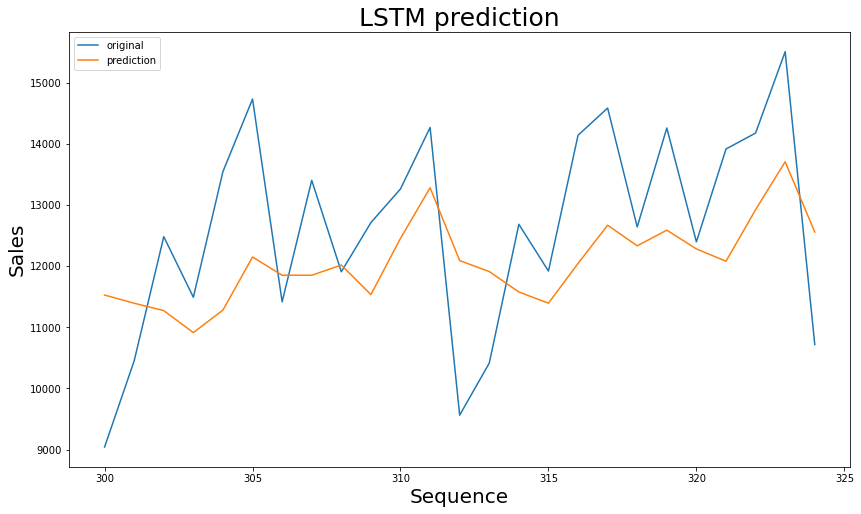

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 14ms/step - loss: 0.1230 - mae: 0.3071


[0.12295045703649521, 0.3071213364601135]